In [33]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings

#warnings.filterwarnings('ignore')

#Read in data and check shape
df = pd.read_csv('data.csv')
print(df.shape)
display(df.head())

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

(1143, 15)


,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [34]:
# df.dropna(subset='Fighter 2', inplace=True)
# df.dropna(subset='Date', inplace=True)

#Check for null values, data types, and duplicates
print(df.isnull().sum())
print()
print(df.dtypes)
print()
print(df.describe())
print()
print(df.duplicated().sum())

# Find and display duplicates
duplicates = df[df.duplicated()]
display(duplicates)

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

ad_id                    int64
reporting_start         object
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
dtype: object

              ad_id    interest1     interest2    interest3   impressions  \
count  1.143000e+03  114

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion


In [3]:
df[df['total_conversion'].isna()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
761,1121594,26/08/2017,26/08/2017,45-49,M,10,14,14,426500,72,128.279999,4,1.0,NaN,NaN
762,1121597,30/08/2017,30/08/2017,45-49,M,15,21,19,54237,7,10.780000,2,1.0,NaN,NaN
763,1121598,30/08/2017,30/08/2017,45-49,M,15,19,18,506916,89,133.699999,2,2.0,NaN,NaN
764,1121599,30/08/2017,30/08/2017,45-49,M,15,17,18,250960,42,64.880000,2,0.0,NaN,NaN
765,1121601,30/08/2017,30/08/2017,45-49,M,16,20,18,2286228,353,603.380002,16,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.0,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.0,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.0,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710001,8,2.0,NaN,NaN


In [35]:
# Identify the rows where 'total_conversion' is NaN
mask = df['total_conversion'].isna()

# Shift the data in these rows to the left by two places
df.loc[mask, 'campaign_id':'approved_conversion'] = df.loc[mask, 'campaign_id':'approved_conversion'].shift(2, axis=1)

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_39270/748553537.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['10' '15' '15' '15' '16' '16' '16' '16' '16' '18' '18' '18' '19' '19'
 '19' '19' '20' '20' '20' '20' '20' '21' '21' '21' '22' '23' '23' '23'
 '24' '25' '25' '26' '27' '27' '27' '27' '27' '28' '28' '28' '28' '28'
 '29' '29' '29' '29' '29' '29' '31' '31' '31' '32' '32' '32' '32' '36'
 '63' '63' '63' '64' '65' '2' '66' '10' '10' '15' '15' '15' '16' '16' '16'
 '16' '16' '18' '18' '18' '19' '19' '19' '19' '19' '20' '20' '20' '21'
 '21' '21' '21' '22' '22' '23' '24' '24' '24' '24' '25' '26' '26' '27'
 '27' '27' '27' '28' '28' '28' '28' '29' '29' '29' '29' '30' '30' '30'
 '31' '31' '32' '32' '32' '32' '32' '36' '63' '63' '63' '63' '64' '64'
 '64' '64' '64' '65' '65' '2' '2' '2' '2' '7' '7' '7' '66' '10' '10' '10'
 '10' '15' '15' '16' '16' '16' '16' '16' '16' '18' '19' '19' '21' '21'
 

In [36]:
df[df['campaign_id'].isna()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
761,1121594,26/08/2017,26/08/2017,None,None,45-49,M,10,14,14,426500.0,72,128.279999,4.0,1.0
762,1121597,30/08/2017,30/08/2017,None,None,45-49,M,15,21,19,54237.0,7,10.780000,2.0,1.0
763,1121598,30/08/2017,30/08/2017,None,None,45-49,M,15,19,18,506916.0,89,133.699999,2.0,2.0
764,1121599,30/08/2017,30/08/2017,None,None,45-49,M,15,17,18,250960.0,42,64.880000,2.0,0.0
765,1121601,30/08/2017,30/08/2017,None,None,45-49,M,16,20,18,2286228.0,353,603.380002,16.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,None,None,45-49,F,109,111,114,1129773.0,252,358.189997,13.0,2.0
1139,1314411,19/08/2017,19/08/2017,None,None,45-49,F,110,111,116,637549.0,120,173.880003,3.0,0.0
1140,1314412,19/08/2017,19/08/2017,None,None,45-49,F,111,113,117,151531.0,28,40.289999,2.0,0.0
1141,1314414,17/08/2017,17/08/2017,None,None,45-49,F,113,114,117,790253.0,135,198.710001,8.0,2.0


In [37]:
# Fill NaNs in 'campaign_id' and 'fb_campaign_id' with 'blank_id'
df['campaign_id'].fillna('blank_id', inplace=True)
df['fb_campaign_id'].fillna('blank_id', inplace=True)

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_39270/4044493297.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_39270/4044493297.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [38]:
df[df['campaign_id'] == 'blank_id']

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
761,1121594,26/08/2017,26/08/2017,blank_id,blank_id,45-49,M,10,14,14,426500.0,72,128.279999,4.0,1.0
762,1121597,30/08/2017,30/08/2017,blank_id,blank_id,45-49,M,15,21,19,54237.0,7,10.780000,2.0,1.0
763,1121598,30/08/2017,30/08/2017,blank_id,blank_id,45-49,M,15,19,18,506916.0,89,133.699999,2.0,2.0
764,1121599,30/08/2017,30/08/2017,blank_id,blank_id,45-49,M,15,17,18,250960.0,42,64.880000,2.0,0.0
765,1121601,30/08/2017,30/08/2017,blank_id,blank_id,45-49,M,16,20,18,2286228.0,353,603.380002,16.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,blank_id,blank_id,45-49,F,109,111,114,1129773.0,252,358.189997,13.0,2.0
1139,1314411,19/08/2017,19/08/2017,blank_id,blank_id,45-49,F,110,111,116,637549.0,120,173.880003,3.0,0.0
1140,1314412,19/08/2017,19/08/2017,blank_id,blank_id,45-49,F,111,113,117,151531.0,28,40.289999,2.0,0.0
1141,1314414,17/08/2017,17/08/2017,blank_id,blank_id,45-49,F,113,114,117,790253.0,135,198.710001,8.0,2.0


In [39]:
df['CTR'] = df['clicks'] / df['impressions']
df['CPC'] = df['spent'] / df['clicks']
df['CPM'] = df['spent'] / df['impressions'] * 1000
df['CVR'] = df['approved_conversion'] / df['clicks']
df['CPA'] = df['spent'] / df['approved_conversion']

In [40]:
df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CVR,CPA
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.430000,2.0,1.0,0.000136,1.430000,0.194558,1.000000,1.430000
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.820000,2.0,0.0,0.000112,0.910000,0.101898,0.000000,inf
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.000000,1.0,0.0,0.000000,NaN,0.000000,NaN,NaN
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.250000,1.0,0.0,0.000235,1.250000,0.293496,0.000000,inf
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.290000,1.0,1.0,0.000242,1.290000,0.312122,1.000000,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,blank_id,blank_id,45-49,F,109,111,114,1129773.0,252,358.189997,13.0,2.0,0.000223,1.421389,0.317046,0.007937,179.094999
1139,1314411,19/08/2017,19/08/2017,blank_id,blank_id,45-49,F,110,111,116,637549.0,120,173.880003,3.0,0.0,0.000188,1.449000,0.272732,0.000000,inf
1140,1314412,19/08/2017,19/08/2017,blank_id,blank_id,45-49,F,111,113,117,151531.0,28,40.289999,2.0,0.0,0.000185,1.438929,0.265886,0.000000,inf
1141,1314414,17/08/2017,17/08/2017,blank_id,blank_id,45-49,F,113,114,117,790253.0,135,198.710001,8.0,2.0,0.000171,1.471926,0.251451,0.014815,99.355000


/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_39270/4155837374.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




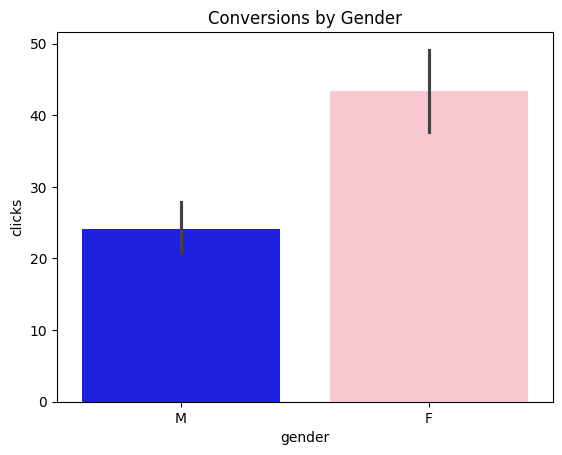

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_39270/4155837374.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




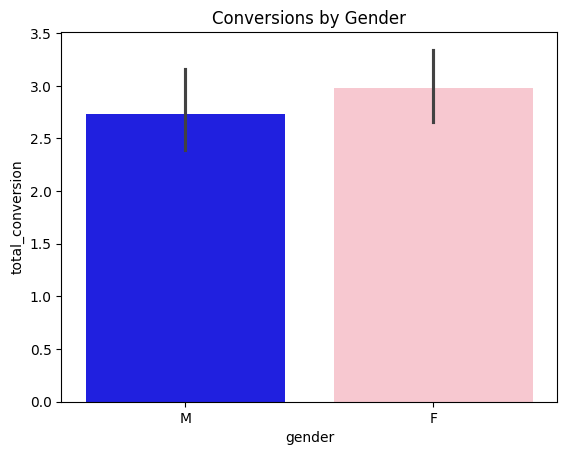

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'gender', 'clicks', and 'conversions' columns
sns.barplot(x='gender', y='clicks', data=df, palette={'M': 'blue', 'F': 'pink'})
plt.title('Conversions by Gender')
plt.show()

sns.barplot(x='gender', y='total_conversion', data=df, palette={'M': 'blue', 'F': 'pink'})
plt.title('Conversions by Gender')
plt.show()

/Users/jevan/Documents/python_projects/fb_ad_causal_inference/fb_ad_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/jevan/Documents/python_projects/fb_ad_causal_inference/fb_ad_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/jevan/Documents/python_projects/fb_ad_causal_inference/fb_ad_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/jevan/Documents/python_projects/fb_ad_causal_inference/fb

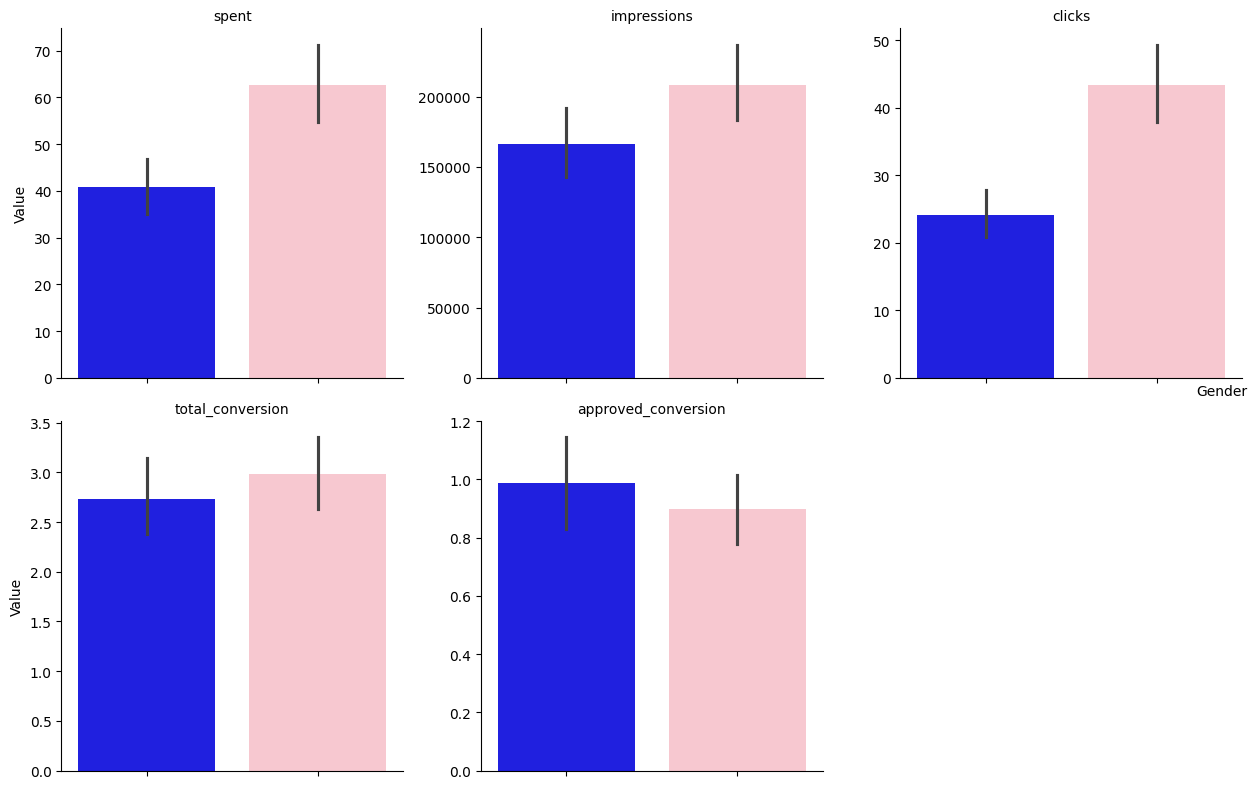

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# First, melt your DataFrame so that it's in long format
df_long = df.melt(id_vars=['gender'], value_vars=['spent', 'impressions', 'clicks', 'total_conversion', 'approved_conversion'],
                  var_name='metric', value_name='value')

# Create a FacetGrid, this will provide a template for the individual plots
g = sns.FacetGrid(df_long, col='metric', col_wrap=3, sharey=False, height=4)

# Now map the individual plots to the grid with the barplot function
g.map(sns.barplot, 'gender', 'value', palette={'M': 'blue', 'F': 'pink'}, order=['M', 'F'])

# Additional customizations can be done in a similar manner
g.set_titles("{col_name}")
g.set_axis_labels("", "Value")
g.add_legend(title='Gender')

# Adjust each axis individually
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

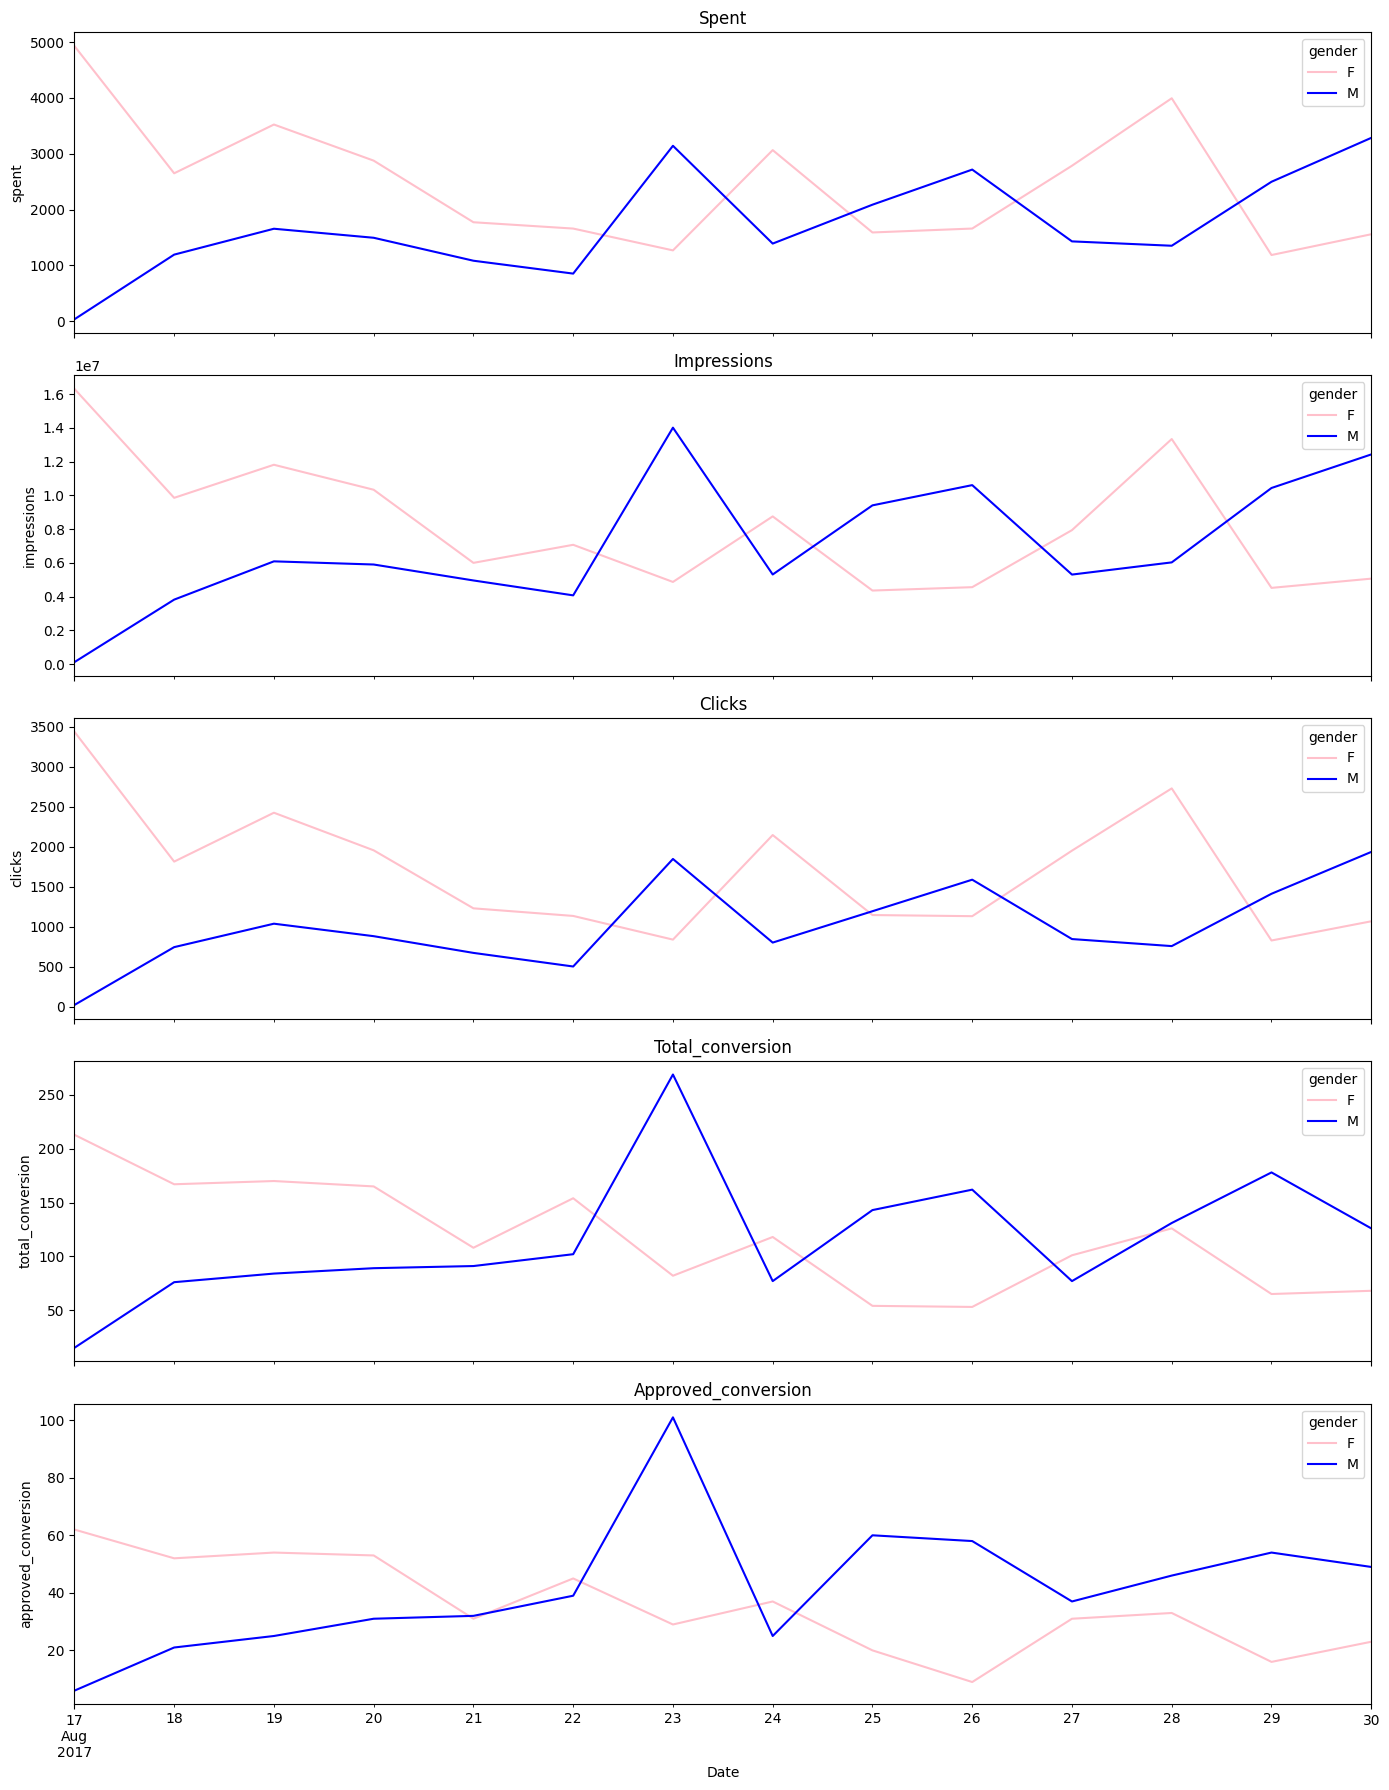

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it includes the 'reporting_start' column along with the metrics

# Convert 'reporting_start' to datetime
df['reporting_start'] = pd.to_datetime(df['reporting_start'], dayfirst=True)

# Set 'reporting_start' as the index
df.set_index('reporting_start', inplace=True)

# Now, plot each metric over time in separate subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 18), sharex=True) # Adjust the size as necessary

metrics = ['spent', 'impressions', 'clicks', 'total_conversion', 'approved_conversion']
colors = {'M': 'blue', 'F': 'pink'}

for i, metric in enumerate(metrics):
    # Group by 'reporting_start' and 'gender' and calculate the sum
    # You can also use .mean() if you're interested in the average instead of the total
    df_grouped = df.groupby([df.index, 'gender'])[metric].sum().unstack()
    
    # Plot
    df_grouped.plot(ax=axes[i], color=[colors[gender] for gender in df_grouped.columns])
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylabel(metric)

# Add a legend and an x-label
axes[-1].set_xlabel('Date')
#fig.legend(labels=['Male', 'Female'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

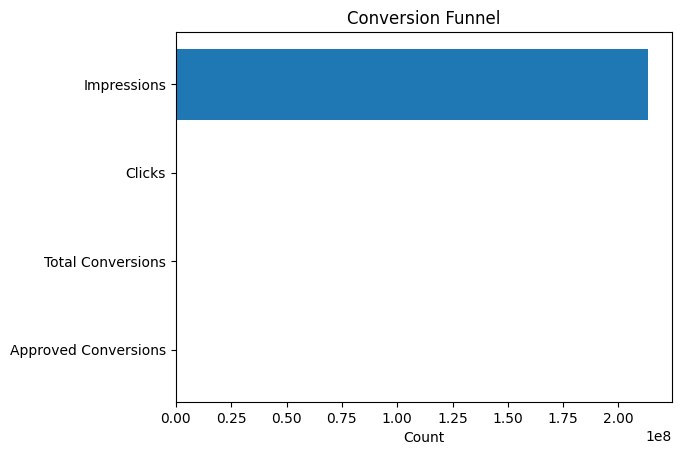

In [44]:
import matplotlib.pyplot as plt

# Example data
stages = ['Impressions', 'Clicks', 'Total Conversions', 'Approved Conversions']
counts = [df['impressions'].sum(), df['clicks'].sum(), df['total_conversion'].sum(), df['approved_conversion'].sum()]

# Create a horizontal bar chart
fig, ax = plt.subplots()

# The y position for each bar
y_pos = range(len(stages))

# The width of each bar (i.e., the count at each stage)
width = counts

# Plotting each stage of the funnel as a horizontal bar
ax.barh(y_pos, width, align='center')

# Setting the y ticks to the stages
ax.set_yticks(y_pos)
ax.set_yticklabels(stages)

# Inverting the y-axis to have the funnel's large end on top
ax.invert_yaxis()

# Labeling the x-axis
ax.set_xlabel('Count')

# Adding a title
ax.set_title('Conversion Funnel')

# Show the plot
plt.show()

In [45]:
import plotly.graph_objects as go

# Calculate the total number of events at each stage of the funnel
impressions = df['impressions'].sum()
clicks = df[df['clicks'] > 0]['clicks'].sum()  # assuming only positive clicks lead to conversions
total_conversions = df[df['total_conversion'] > 0]['total_conversion'].sum()  # same for conversions
approved_conversions = df[df['approved_conversion'] > 0]['approved_conversion'].sum()  # same for approved conversions

# Define source and target nodes
source = [0, 1, 2]  # indices of the source nodes
target = [1, 2, 3]  # indices of the target nodes
value = [clicks, total_conversions, approved_conversions]  # volume from source to target

# Define the nodes
label = ["Impressions", "Clicks", "Total Conversions", "Approved Conversions"]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,  # Padding between nodes
      thickness=20,  # Node thickness
      line=dict(color="black", width=0.5),  # Border line
      label=label
    ),
    link=dict(
      source=source,
      target=target,
      value=value
    ))])

# Set the title
fig.update_layout(title_text='Advertising Conversion Funnel', font_size=10)

# Show the figure
fig.show()


In [46]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the DataFrame for males and females
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

# Define a function to calculate the metrics and create Sankey data
def calculate_sankey_data(df):
    impressions = df['impressions'].sum()
    clicks = df[df['clicks'] > 0]['clicks'].sum()
    total_conversions = df[df['total_conversion'] > 0]['total_conversion'].sum()
    approved_conversions = df[df['approved_conversion'] > 0]['approved_conversion'].sum()
    
    # Define source, target, and value for the Sankey diagram
    source = [0, 1, 2]
    target = [1, 2, 3]
    value = [clicks, total_conversions, approved_conversions]
    
    return source, target, value

# Calculate data for each gender
source_male, target_male, value_male = calculate_sankey_data(df_male)
source_female, target_female, value_female = calculate_sankey_data(df_female)

# Create the subplot figure
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'sankey'}, {'type': 'sankey'}]])

# Male Sankey
fig.add_trace(go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=["Impressions", "Clicks", "Total Conversions", "Approved Conversions"]
    ),
    link=dict(
      source=source_male,
      target=target_male,
      value=value_male
    )), row=1, col=1)

# Female Sankey
fig.add_trace(go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=["Impressions", "Clicks", "Total Conversions", "Approved Conversions"]
    ),
    link=dict(
      source=source_female,
      target=target_female,
      value=value_female
    )), row=1, col=2)

# Update layout
fig.update_layout(title_text="Gender-Specific Advertising Conversion Funnels", template="plotly")

# Show the figure
fig.show()

In [ ]:
#TODO: Ask if there's a way to make the two Sankey diagrams share the same scale for better comparison. Also, ask if there's a way to add a legend to the diagrams.

In [48]:
from scipy import stats

# Assuming `df_male` and `df_female` are your dataframes for males and females
# Let's say you are testing the 'clicks' column for normality
stat, p_value = stats.shapiro(df_male['clicks'])

# Check the p-value
if p_value > 0.05:
    print('Male clicks data seems normally distributed (fail to reject H0)')
else:
    print('Male clicks data does not seem normally distributed (reject H0)')

Male clicks data does not seem normally distributed (reject H0)


In [49]:
from scipy import stats

# Assuming `df_male` and `df_female` are your dataframes for males and females
# Let's say you are testing the 'clicks' column for normality
stat, p_value = stats.shapiro(df_female['clicks'])

# Check the p-value
if p_value > 0.05:
    print('Female clicks data seems normally distributed (fail to reject H0)')
else:
    print('Female clicks data does not seem normally distributed (reject H0)')

Female clicks data does not seem normally distributed (reject H0)


In [50]:
u_stat, p_val = stats.mannwhitneyu(df_male['clicks'], df_female['total_conversion'])

# Check the p-value
if p_val < 0.05:
    print('There is a significant difference between male and female clicks (reject H0)')
else:
    print('There is no significant difference between male and female clicks (fail to reject H0)')

There is a significant difference between male and female clicks (reject H0)


In [51]:
# Group by both 'age_group' and 'gender' and calculate mean clicks
segmented_clicks = df.groupby(['age', 'gender'])['clicks'].mean().unstack()
print(segmented_clicks)


gender          F          M
age                         
30-34   25.883249  19.144105
35-39   38.174312  21.100719
40-44   48.383178  24.844660
45-49   68.413043  36.454545


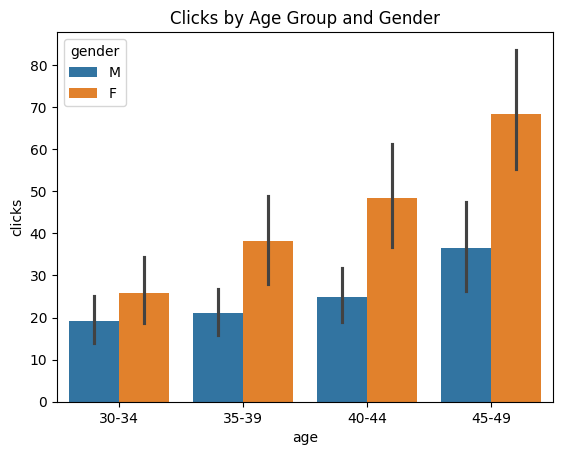

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='age', y='clicks', hue='gender', data=df)
plt.title('Clicks by Age Group and Gender')
plt.show()


In [55]:
df = df.reset_index()

In [56]:
import statsmodels.api as sm

df['gender'] = df['gender'].map({'M': 0, 'F': 1})  # Example conversion for gender

# Assuming 'gender' is coded as 0 for males and 1 for females, and 'spent' and 'clicks' are your variables
X = df[['gender', 'spent']]  # Independent variables
y = df['clicks']  # Dependent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()  # OLS regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.647e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:40:36   Log-Likelihood:                -3718.3
No. Observations:                1143   AIC:                             7443.
Df Residuals:                    1140   BIC:                             7458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2880      0.272     -8.405      0.0

In [57]:
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel

# Create a binary variable for gender and prepare data for PSM
#df['gender_bin'] = df['gender'].apply(lambda x: 1 if x == 'F' else 0)
X = df[['spent']]  # Covariate
y = df['gender']  # Treatment assignment

# Fit logistic regression for propensity score
logit = LogisticRegression()
logit.fit(X, y)
df['propensity_score'] = logit.predict_proba(X)[:, 1]

# Use CausalModel or another PSM tool to match
causal = CausalModel(Y=df['clicks'].values, D=df['gender'].values, X=df['propensity_score'].values)
causal.est_via_matching(bias_adj=True)
print(causal.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      5.310      0.761      6.978      0.000      3.819      6.802
           ATC      4.075      0.872      4.672      0.000      2.365      5.785
           ATT      6.637      0.827      8.026      0.000      5.016      8.258



/Users/jevan/Documents/python_projects/fb_ad_causal_inference/fb_ad_venv/lib/python3.10/site-packages/causalinference/estimators/matching.py:100: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



In [29]:
print(df.dtypes)

ad_id                    int64
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1               object
interest2               object
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
CTR                    float64
CPC                    float64
CPM                    float64
CVR                    float64
CPA                    float64
dtype: object


In [30]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df

,ad_id,reporting_end,campaign_id,fb_campaign_id,age,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CVR,CPA,gender_M
reporting_start,,,,,,,,,,,,,,,,,,,
2017-08-17,708746,17/08/2017,916,103916,30-34,15,17,17,7350.0,1,1.430000,2.0,1.0,0.000136,1.430000,0.194558,1.000000,1.430000,True
2017-08-17,708749,17/08/2017,916,103917,30-34,16,19,21,17861.0,2,1.820000,2.0,0.0,0.000112,0.910000,0.101898,0.000000,inf,True
2017-08-17,708771,17/08/2017,916,103920,30-34,20,25,22,693.0,0,0.000000,1.0,0.0,0.000000,NaN,0.000000,NaN,NaN,True
2017-08-30,708815,30/08/2017,916,103928,30-34,28,32,32,4259.0,1,1.250000,1.0,0.0,0.000235,1.250000,0.293496,0.000000,inf,True
2017-08-17,708818,17/08/2017,916,103928,30-34,28,33,32,4133.0,1,1.290000,1.0,1.0,0.000242,1.290000,0.312122,1.000000,1.290000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-19,1314410,19/08/2017,blank_id,blank_id,45-49,109,111,114,1129773.0,252,358.189997,13.0,2.0,0.000223,1.421389,0.317046,0.007937,179.094999,False
2017-08-19,1314411,19/08/2017,blank_id,blank_id,45-49,110,111,116,637549.0,120,173.880003,3.0,0.0,0.000188,1.449000,0.272732,0.000000,inf,False
2017-08-19,1314412,19/08/2017,blank_id,blank_id,45-49,111,113,117,151531.0,28,40.289999,2.0,0.0,0.000185,1.438929,0.265886,0.000000,inf,False
